In [1]:
##wrapper
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import RFE # 目标函数
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [2]:
# data = pd.read_csv('dataset3_Z.csv')
# #打乱顺序
# df = shuffle(data)
# df.to_csv("dataset3.csv",index =None)

In [2]:
df = pd.read_csv("output_1.csv")

In [3]:
X = df.drop('label', axis=1)
y = df['label']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=100)

In [4]:
print('Number of columns:',len(df.columns))

Number of columns: 129


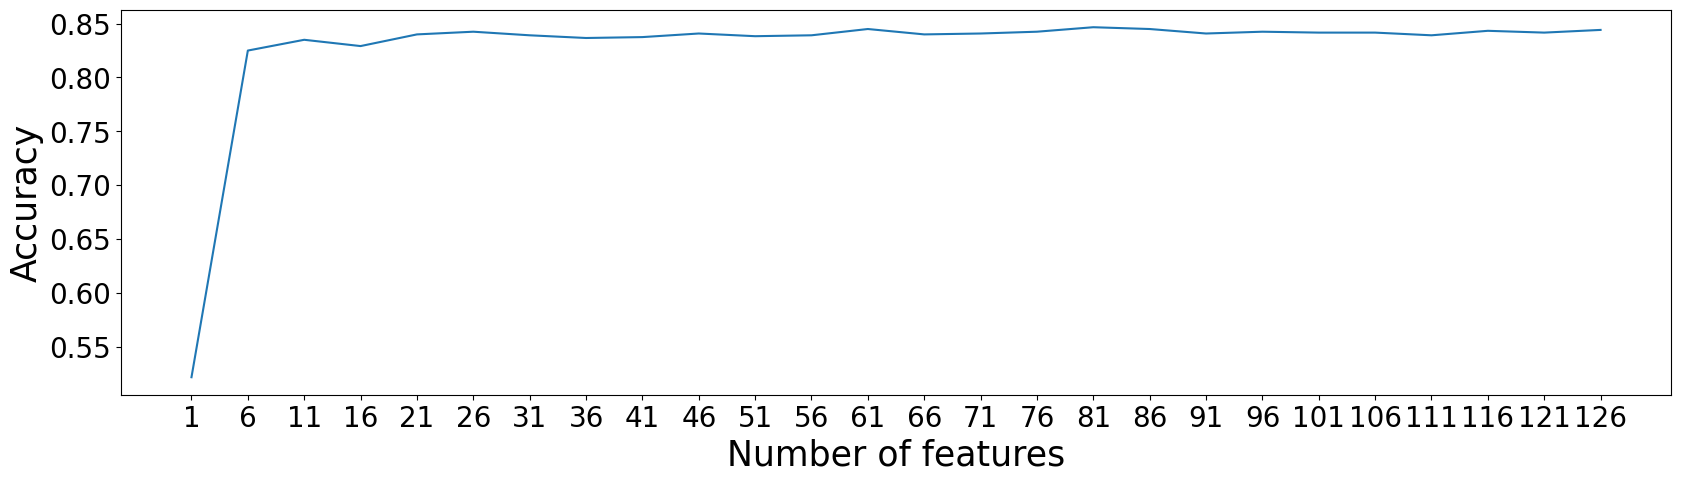

In [5]:
#Draw a learning curve to find the optimal threshold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE # Objective function
RFC_ = RFC(n_estimators = 100,random_state = 0)#Random forest instantiation

score=[]
for i in range(1,128,5):
    X_wrapper = RFE(RFC_,n_features_to_select = i,step = 1).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize = [20,5])    
plt.plot(range(1,128,5),score)
plt.xticks(range(1,128,5),fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of features',fontsize=25)
plt.ylabel('Accuracy',fontsize=25)
plt.savefig('RFE.png',dpi=600)
plt.show()

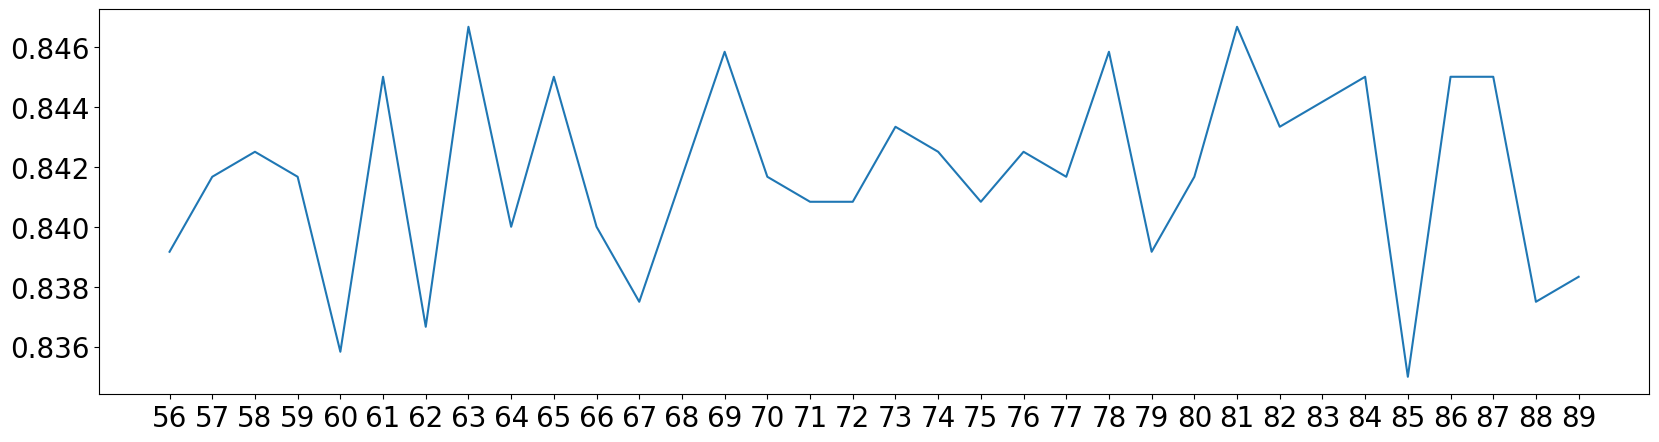

In [6]:
#Draw a learning curve to find the optimal threshold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE # Objective function
RFC_ = RFC(n_estimators = 100,random_state = 0)#Random forest instantiation

score=[]
for i in range(56,90,1):
    X_wrapper = RFE(RFC_,n_features_to_select = i,step = 1).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize = [20,5])    
plt.plot(range(56,90,1),score)
plt.xticks(range(56,90,1),fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [7]:
RFC_ = RFC(n_estimators = 100,random_state = 512)#随机森林实例化

In [8]:
selector = RFE(RFC_,n_features_to_select=63,step=1).fit(X,y)
selector.support_.sum()

63

In [9]:
selector.ranking_

array([54,  1,  1,  5,  1,  1,  1,  1, 35,  7, 14, 64,  1, 50,  1, 11,  1,
        1, 33, 20,  1, 21, 66,  1,  1,  2,  1,  3,  1, 55, 12, 44, 22,  1,
       32, 29,  1, 27,  1, 31,  1, 25, 23, 58,  1, 41,  1,  1,  6,  1,  1,
        1,  1,  1, 63,  1, 18, 62,  1, 47,  1,  1, 52,  1,  1,  1,  1, 24,
        1, 10,  1,  1, 53, 49,  9,  1,  1,  1, 59, 65,  1,  1,  1,  4,  1,
        1, 46, 13,  1,  1, 37,  1,  1,  1,  1, 30, 34,  1, 19, 36, 60,  1,
       40,  1,  1,  1, 15,  1, 39, 26,  1,  1,  1, 17, 45, 16, 28,  1, 56,
        1, 57, 38, 42, 48, 43,  8, 51, 61])

In [10]:
selector.get_support(True)

array([  1,   2,   4,   5,   6,   7,  12,  14,  16,  17,  20,  23,  24,
        26,  28,  33,  36,  38,  40,  44,  46,  47,  49,  50,  51,  52,
        53,  55,  58,  60,  61,  63,  64,  65,  66,  68,  70,  71,  75,
        76,  77,  80,  81,  82,  84,  85,  88,  89,  91,  92,  93,  94,
        97, 101, 103, 104, 105, 107, 110, 111, 112, 117, 119])

In [11]:
X_wrapper = selector.transform(X)

In [12]:
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

0.8383333333333333